#  Netflix Movies & TV Shows Analysis

An exploratory data analysis (EDA) of Netflix content to understand content types, country trends, growth over time, and more.

---

##  1. Data Loading & Inspection


In [27]:
# netflix_analysis.ipynb

# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 2. Load Dataset
df = pd.read_csv("netflix_titles.csv")

# 3. Overview of Dataset
df.head()
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

##  2. Data Cleaning

- Drop duplicates (if any)
- Handle missing values
- Convert 'date_added' to datetime
- Extract month & year from 'date_added'


In [28]:

# -----------------------------
# 1. HANDLE DATE FORMAT ERROR
# -----------------------------

# Convert 'date_added' with mixed formats and prevent crash on bad rows
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')

# Extract Year and Month added (after fixing date)
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# -----------------------------
# 2. HANDLE MISSING VALUES
# -----------------------------

# Check how many are missing
missing_summary = df.isnull().sum()
print("Missing values before cleaning:\n", missing_summary)

# Fill missing 'country' with the most common country (mode)
most_common_country = df['country'].mode()[0]
df['country'] = df['country'].fillna(most_common_country)

# Fill missing 'director' and 'cast' with "Not Listed"
df['director'] = df['director'].fillna("Not Listed")
df['cast'] = df['cast'].fillna("Not Listed")

# Drop rows missing essential fields
df = df.dropna(subset=['title', 'type', 'date_added'])

# -----------------------------
# 3. TEXT CLEANING
# -----------------------------

# Remove extra spaces from text fields
text_cols = ['title', 'director', 'cast', 'country', 'rating', 'duration', 'listed_in']
for col in text_cols:
    df[col] = df[col].astype(str).str.strip()

# -----------------------------
# 4. FEATURE ENGINEERING
# -----------------------------

# Extract main genre from listed_in (first genre only)
df['main_genre'] = df['listed_in'].str.split(',').str[0]

# -----------------------------
# 5. REMOVE DUPLICATES
# -----------------------------

df = df.drop_duplicates()

# -----------------------------
# 6. VERIFY CLEANED DATA
# -----------------------------

print("✅ Cleaning Complete")
print(df.info())
print(df.head(8))


# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


Missing values before cleaning:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
year_added        10
month_added       10
dtype: int64
✅ Cleaning Complete
<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8797 non-null   object        
 1   type          8797 non-null   object        
 2   title         8797 non-null   object        
 3   director      8797 non-null   object        
 4   cast          8797 non-null   object        
 5   country       8797 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8797 non-null   int64         
 8   rating        8797 non-null   obj

VISUALIZATION

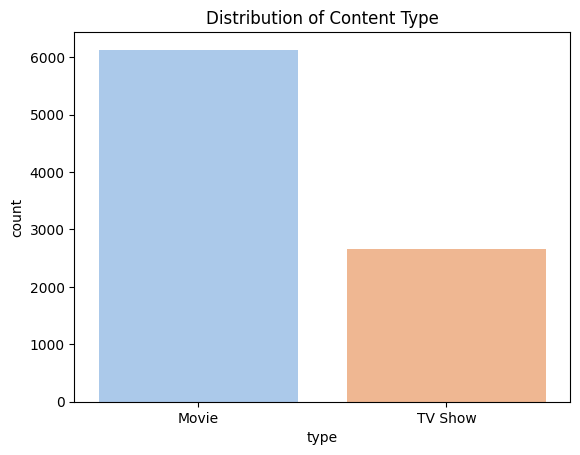

In [46]:
# Count of Movies vs TV Shows
sns.countplot(data=df, x='type', hue='type', palette='pastel', legend=False)
plt.title('Distribution of Content Type')
plt.show()


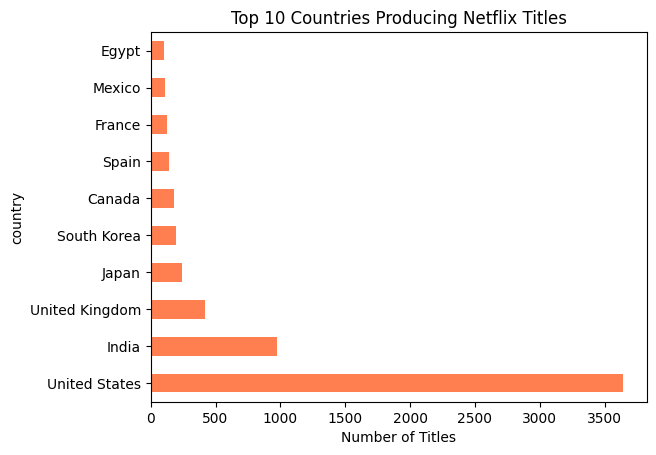

In [47]:
# Top 10 countries by number of titles
df['country'].value_counts().dropna().head(10).plot(kind='barh', color='coral')
plt.title('Top 10 Countries Producing Netflix Titles')
plt.xlabel('Number of Titles')
plt.show()


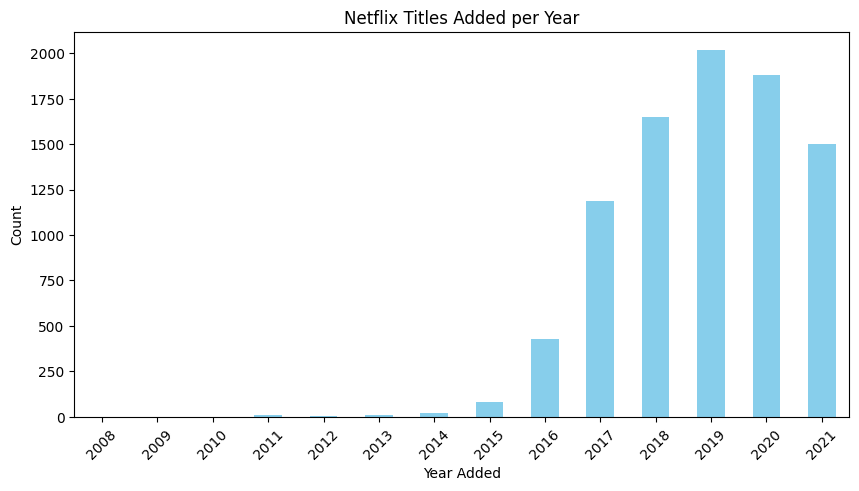

In [48]:
# Titles added over time
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title('Netflix Titles Added per Year')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


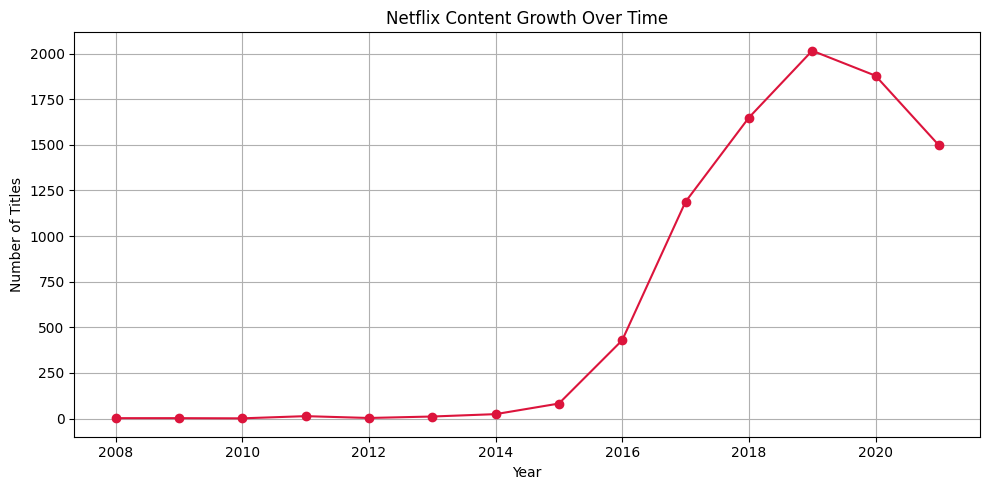

In [49]:
import matplotlib.pyplot as plt

# Count of titles added per year
titles_per_year = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(10,5))
plt.plot(titles_per_year.index, titles_per_year.values, marker='o', color='crimson')
plt.title("Netflix Content Growth Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.tight_layout()
plt.show()

